<a href="https://colab.research.google.com/github/Guhan2348519/lab-task/blob/main/aml_class_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data=pd.read_csv('/content/drive/MyDrive/data - data.csv')

In [5]:
data.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02-05-2014 0:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02-05-2014 0:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02-05-2014 0:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02-05-2014 0:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02-05-2014 0:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


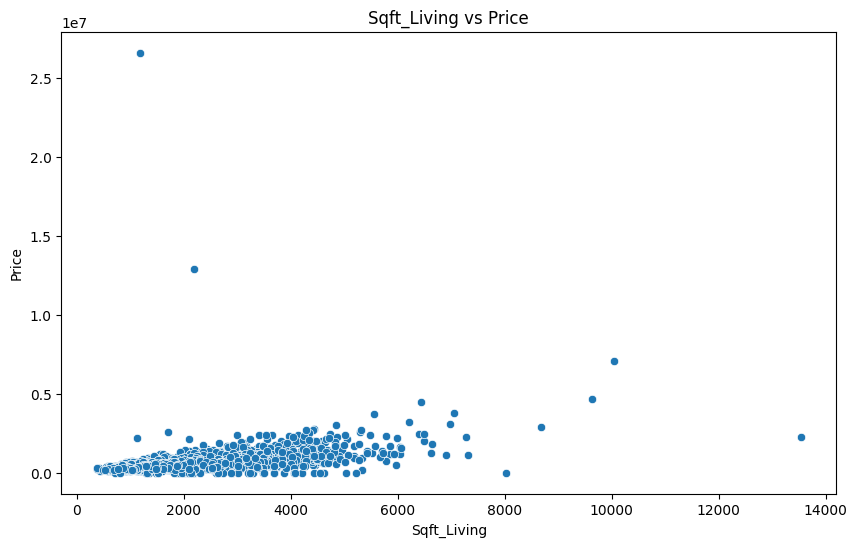

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="sqft_living", y="price", data=data)
plt.title('Sqft_Living vs Price')
plt.xlabel('Sqft_Living')
plt.ylabel('Price')
plt.show()



comparing  sqft_living with price where more scatter points are betwen 2000-6000


Checking The Year Column


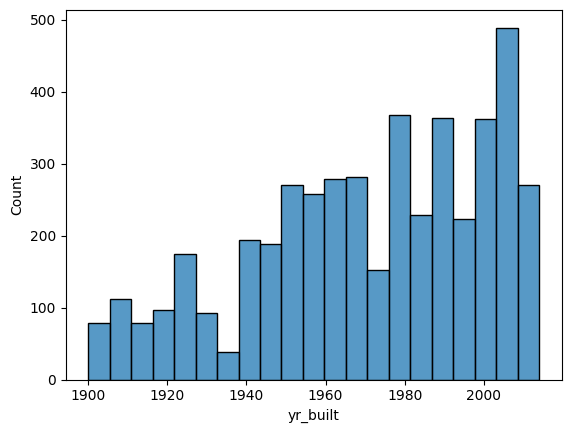

In [7]:
print("\nChecking The Year Column")
sns.histplot(data['yr_built'])
plt.show()

Counting the number of house built for each year

In [8]:
num_bins = 5
min_year_built = data['yr_built'].min()
max_year_built = data['yr_built'].max()
bin_width = (max_year_built - min_year_built) / num_bins


In [9]:
bin_boundaries = np.arange(min_year_built, max_year_built + bin_width, bin_width)
bin_labels = [f"Bin {i+1}: {int(bin_boundaries[i])} - {int(bin_boundaries[i+1])}" for i in range(len(bin_boundaries)-1)]


In [10]:
data['year_built_bin'] = pd.cut(data['yr_built'], bins=bin_boundaries, labels=bin_labels, include_lowest=True)
bin_means = data.groupby('year_built_bin')['yr_built'].mean()

print("Bin Means:")
print(bin_means)
print("\nBin Boundaries:")
print(bin_boundaries)

Bin Means:
year_built_bin
Bin 1: 1900 - 1922    1911.414062
Bin 2: 1922 - 1945    1934.308271
Bin 3: 1945 - 1968    1957.737024
Bin 4: 1968 - 1991    1981.212042
Bin 5: 1991 - 2013    2002.973160
Name: yr_built, dtype: float64

Bin Boundaries:
[1900.  1922.8 1945.6 1968.4 1991.2 2014. ]


In [12]:
sqft_bins = [0, 1000, 2000, 3000, data['sqft_above'].max()]
data['Sqft Above Bin Boundaries'] = pd.cut(data['sqft_above'], bins=sqft_bins)
bin_means = [(start + end) / 2 for start, end in zip(sqft_bins[:-1], sqft_bins[1:])]
data['Sqft Above Bin Means'] = pd.cut(data['sqft_above'], bins=sqft_bins, labels=bin_means)
print(data[['sqft_above', 'Sqft Above Bin Boundaries', 'Sqft Above Bin Means']])

      sqft_above Sqft Above Bin Boundaries Sqft Above Bin Means
0           1340              (1000, 2000]               1500.0
1           3370              (3000, 9410]               6205.0
2           1930              (1000, 2000]               1500.0
3           1000                 (0, 1000]                500.0
4           1140              (1000, 2000]               1500.0
...          ...                       ...                  ...
4595        1510              (1000, 2000]               1500.0
4596        1460              (1000, 2000]               1500.0
4597        3010              (3000, 9410]               6205.0
4598        1070              (1000, 2000]               1500.0
4599        1490              (1000, 2000]               1500.0

[4600 rows x 3 columns]


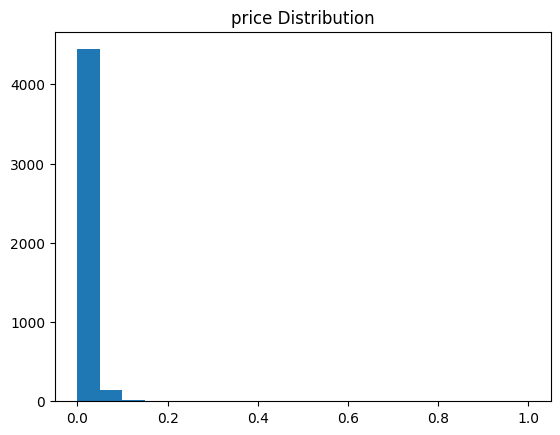

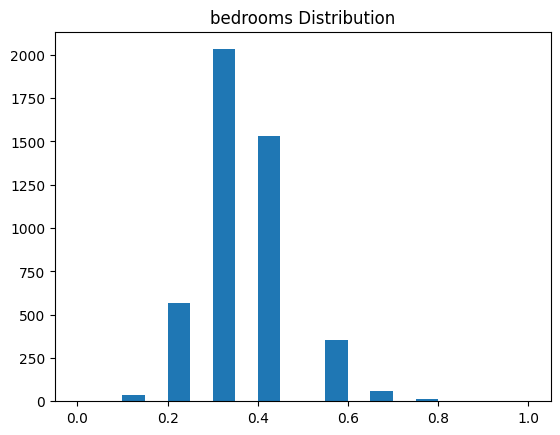

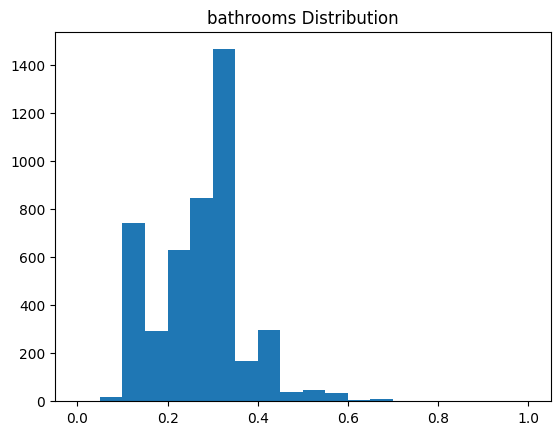

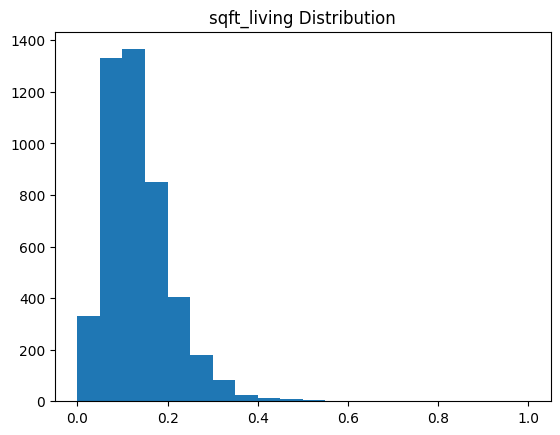

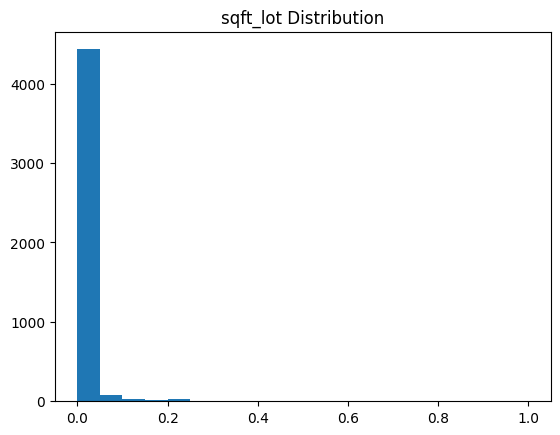

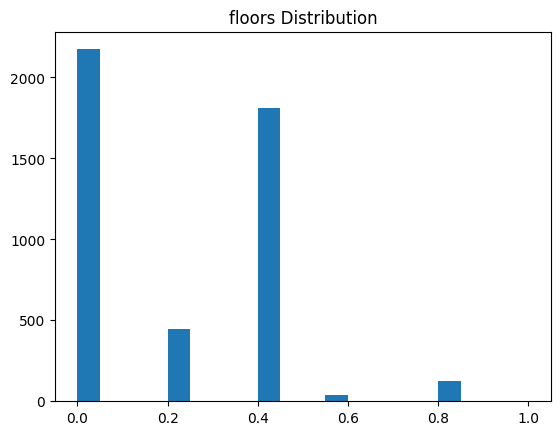

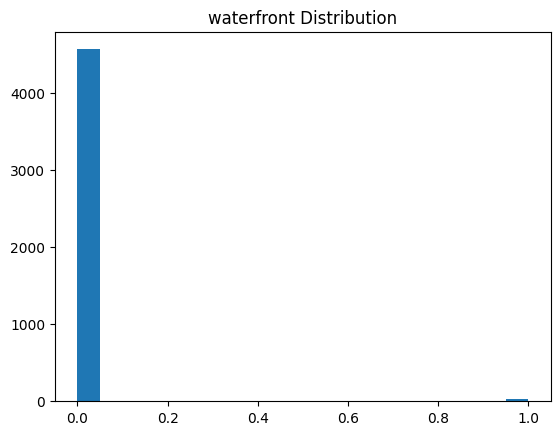

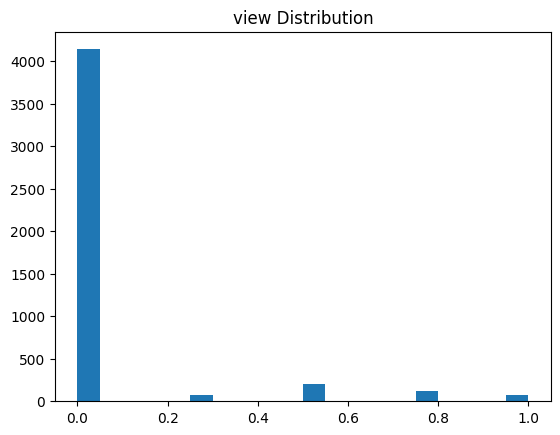

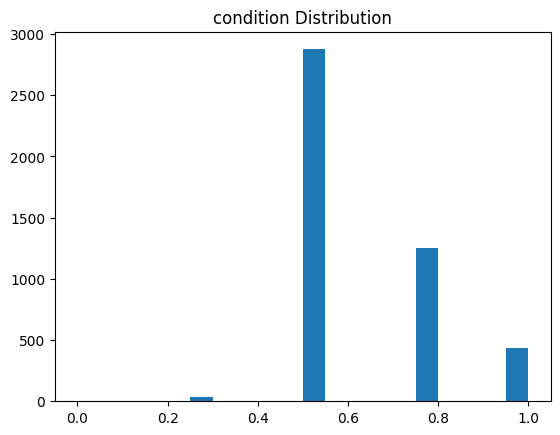

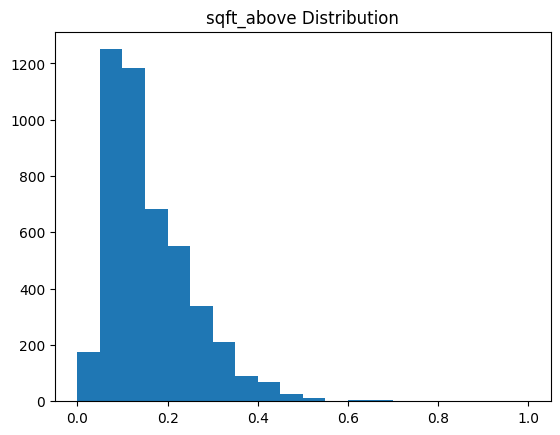

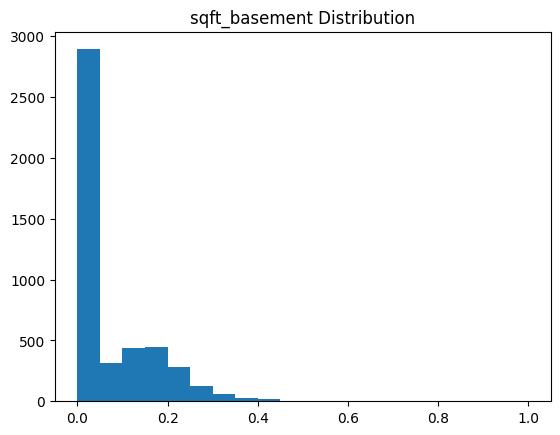

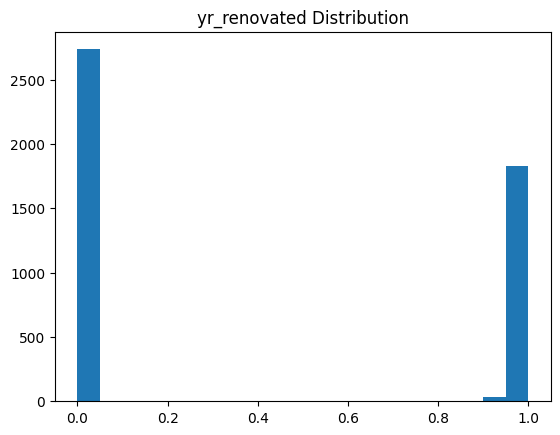

In [14]:
numerical_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_renovated']
data[numerical_cols] = (data[numerical_cols] - data[numerical_cols].min()) / (data[numerical_cols].max() - data[numerical_cols].min())
for col in numerical_cols:
    plt.hist(data[col], bins=20)
    plt.title(f'{col} Distribution')
    plt.show()


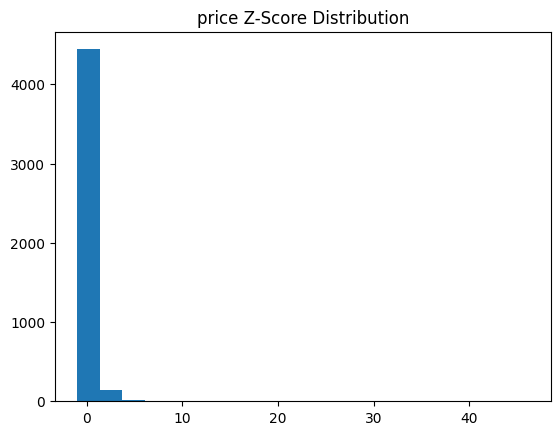

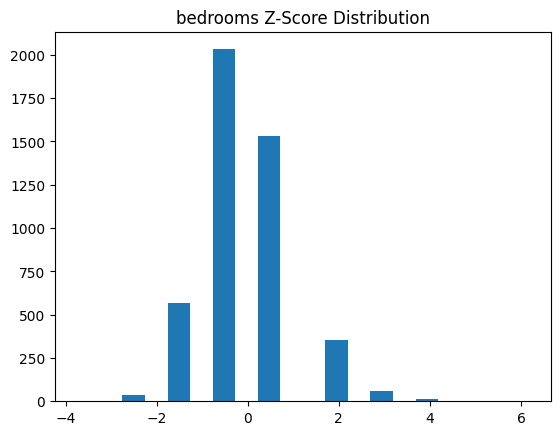

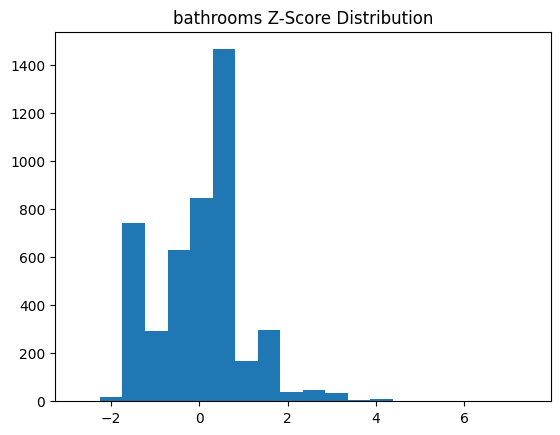

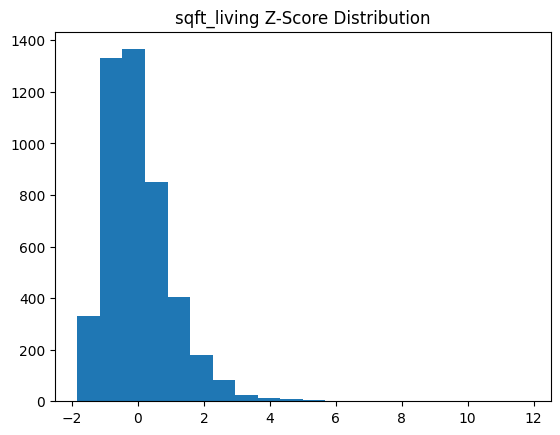

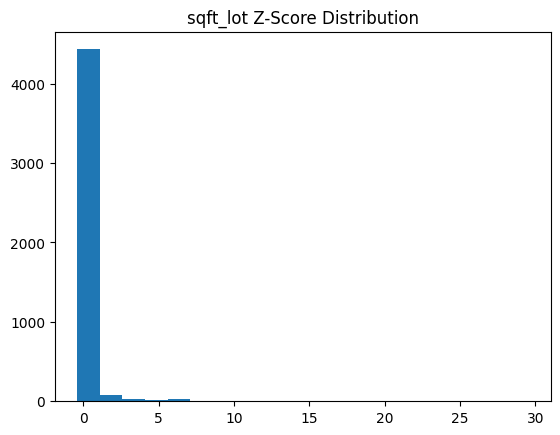

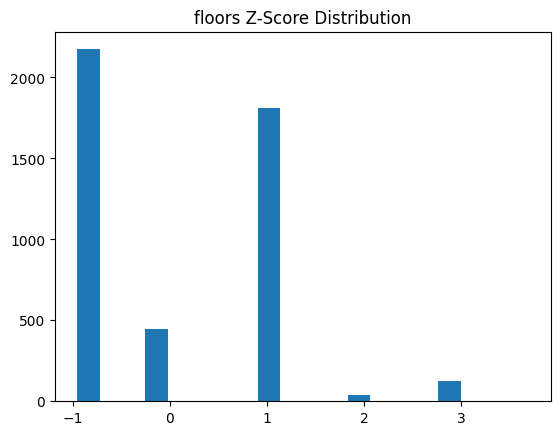

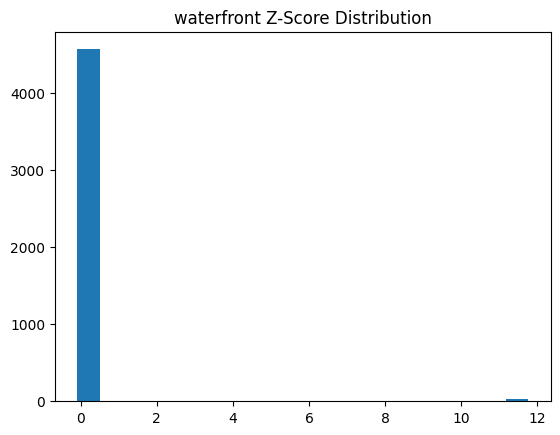

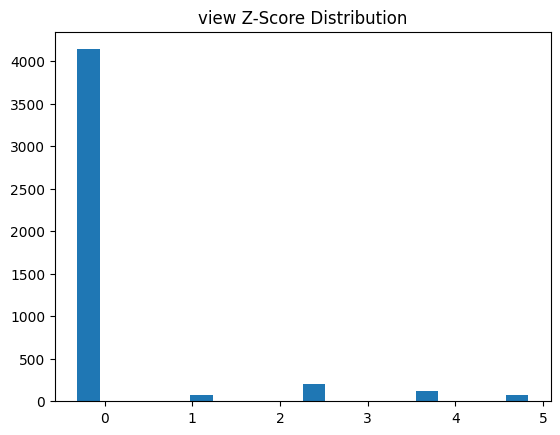

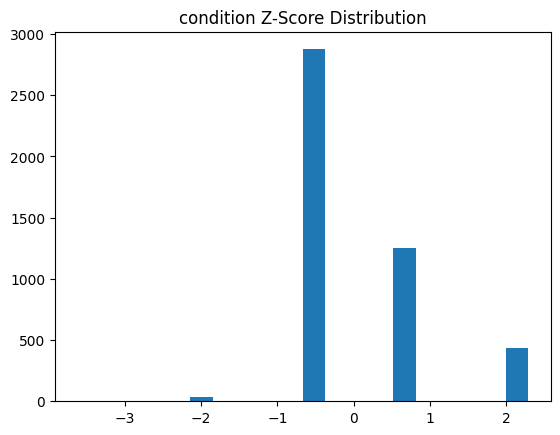

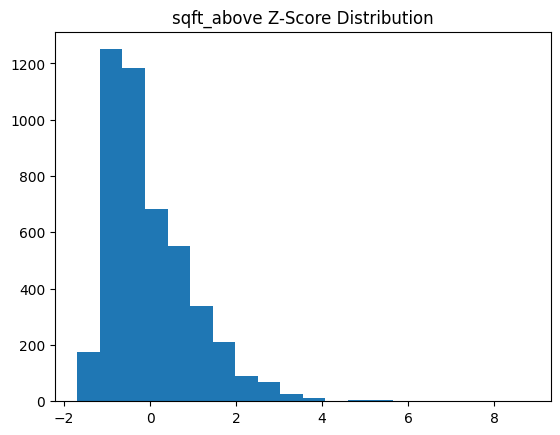

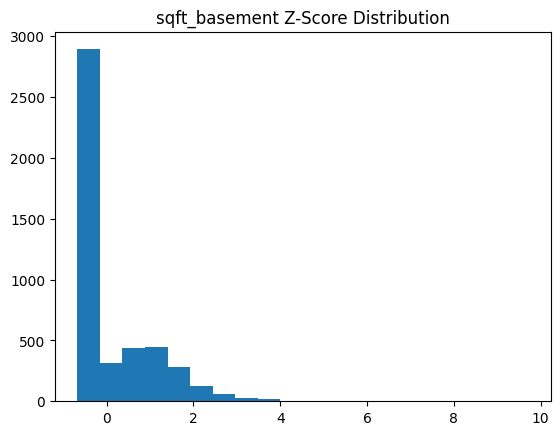

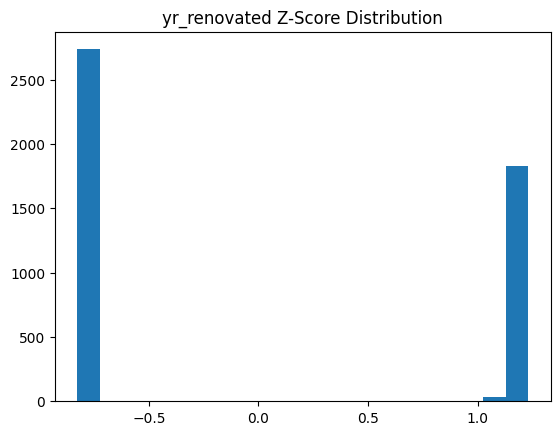

In [17]:
from scipy.stats import zscore
data[numerical_cols] = zscore(data[numerical_cols])

for col in numerical_cols:
    plt.hist(data[col], bins=20)
    plt.title(f'{col} Z-Score Distribution')
    plt.show()